<a href="https://colab.research.google.com/github/xr-cc/proj-hsg-env-chal/blob/master/code/spatial_corr_income_seismic_CES3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spatial correlation analysis of important variables in CES3 Bay Area data, with income and seismic data incorporated

Follow the tutorial in http://darribas.org/gds_scipy16/ipynb_md/04_esda.html.


In [ ]:
! pip install geopandas
! pip install descartes

In [ ]:
! pip install mapclassify

In [ ]:
! pip install libpysal

In [ ]:
! pip install esda

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable

# import pysal as ps
# from pysal.contrib.viz import mapping as maps

import mapclassify as mc
import libpysal as lps
from esda.moran import Moran,Moran_Local

from matplotlib import colors

In [6]:
# grant access to Google Drive
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [36]:
# os.listdir("/content/drive/My Drive/")
from google.colab import files

In [8]:
# load data

dataPath = "/content/drive/My Drive/DS4A/DS4A_Team 31/data/CES3/"
xls = pd.ExcelFile(dataPath+"CES3, income brackets, seismic - Bay Area.xlsx")
sheets = xls.sheet_names
print(sheets)


['CES 3.0 (2018 Update)', 'Income cutoffs per county', 'Data Dictionary', 'Missing&NAData', 'Demographic profile']


In [9]:
# load dataframes

df = pd.read_excel(xls, sheet_name=sheets[0])
df_dict = pd.read_excel(xls, sheet_name=sheets[2],skiprows=range(0,6)).dropna(thresh=2)
df_demo = pd.read_excel(xls, sheet_name=sheets[4], header=None,
                        names=['Census Tract','CES 3.0 Score','CES 3.0 Percentile','CES 3.0 Percentile Range','Total Population',
                               'California County','Age:<10','Age:11-64','Age:>65', 'Race:Hispanic','Race:White','Race:AfricanAmerican',
                               'Race:NativeAmerican','Race:Aisan','Race:Other'],skiprows=[0]).dropna()

df_dict_temp = df_dict.dropna()
# var_char = df_dict_temp[df_dict_temp['CalEnviroScreen Category'].str.contains('Population')]['Variable Name'].drop_duplicates()
# var_char = [v.rstrip() for v in var_char]
# var_char.insert(0,'Census ID')
# print(var_char)

# load geo dataframe
gdf = gpd.read_file(dataPath+"CES3June2018Update.shp")
gdf = gdf[gdf['tract'].isin(df['Census ID'])].reset_index(drop=True).rename(columns={'tract': 'Census ID'})

# join dataframes
gdf = gdf.merge(df, on='Census ID')

In [10]:
gdf.head()

,Census ID,pop2010,California,ZIP_x,City,Longitude_x,Latitude_x,CIscore,CIscoreP,ozone,ozoneP,pm,pmP,diesel,dieselP,drink,drinkP,pest,pestP,RSEIhaz,RSEIhazP,traffic,trafficP,cleanups,cleanupsP,gwthreats,gwthreatsP,haz,hazP,iwb,iwbP,swis,swisP,Pollution,PollutionS,PollutionP,asthma,asthmaP,lbw,lbwP,...,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6.085509e+09,4603,Santa Clara,94043,Mountain View,-122.074346,37.401206,19.89,38,0.035,17,9.96,43,28.58,83,277.40,29,0.000,0,252.02,40,1230.83,76,66.5,98,121.85,98,0.20,61,5,55,0.0,0,48.16,5.93,67,20.70,9,4.77,46,...,277.402571,28.701509,0.000000,0.000000,252.024338,40.296832,1230.83,76.212558,66.5,97.756293,121.85,98.013903,0.200,60.500463,5,55.007738,0.0,0.0,48.161547,5.932202,67.330429,20.70,8.839297,4.77,45.802896,6.48,30.270540,5.0,19.707292,4.6,33.902146,10.5,7.806411,9.9,55.298896,21.5,65.143437,32.337940,3.353660,23.054610
1,6.085510e+09,4688,Santa Clara,94022,Los Altos,-122.120112,37.392783,3.53,1,0.035,17,9.96,43,19.90,61,465.27,48,0.056,16,202.20,36,566.07,38,6.9,50,17.10,66,0.06,28,0,0,0.0,0,34.30,4.23,30,9.01,0,2.63,6,...,465.266900,47.561432,0.055507,16.412742,202.201348,36.118733,566.07,37.974684,6.9,50.474279,17.10,65.921880,0.060,28.044486,0,0.000000,0.0,0.0,34.304607,4.225401,30.105787,9.01,0.423887,2.63,5.549148,3.43,1.882558,2.4,7.418622,2.2,15.677910,5.8,1.759899,3.5,4.251809,15.7,38.461538,8.066243,0.836523,0.731492
2,6.085509e+09,3212,Santa Clara,94306,Palo Alto,-122.114454,37.406981,7.97,8,0.035,17,9.54,41,23.86,73,491.91,52,0.000,0,205.50,37,633.51,45,5.3,45,16.50,65,0.00,0,0,0,0.0,0,32.50,4.00,26,9.79,1,3.75,21,...,491.909027,52.276413,0.000000,0.000000,205.502860,36.530307,633.51,44.742449,5.3,45.220722,16.50,64.581264,0.000,0.000000,0,0.000000,0.0,0.0,32.499793,4.003097,25.550716,9.79,0.610896,3.75,20.889402,3.16,1.009849,3.8,14.042392,13.4,70.590588,15.2,16.668762,5.2,14.151542,15.8,39.083524,19.205372,1.991725,7.478875
3,6.085509e+09,3706,Santa Clara,94043,Mountain View,-122.092278,37.406030,17.20,31,0.035,17,9.54,41,23.86,73,277.40,29,0.000,0,225.06,39,493.52,30,44.2,95,30.85,82,0.02,16,4,49,0.0,0,37.86,4.66,39,21.29,10,3.85,23,...,277.402571,28.701509,0.000000,0.000000,225.063625,38.600649,493.52,30.078957,44.2,95.147756,30.85,82.224429,0.025,15.681186,4,48.795048,0.0,0.0,37.858312,4.663122,39.439950,21.29,9.712006,3.85,22.952710,6.69,33.038275,10.4,40.625789,19.7,83.922144,29.3,43.570082,7.3,32.097982,17.1,45.925362,35.564634,3.688290,27.922815
4,6.085503e+09,4311,Santa Clara,95122,San Jose,-121.822135,37.331408,32.60,64,0.038,22,10.37,53,26.11,79,639.64,72,0.000,0,175.02,33,915.85,63,4.5,42,3.00,22,0.10,43,0,0,0.0,0,37.84,4.66,39,56.72,65,5.34,62,...,639.641415,71.984533,0.000000,0.000000,175.022211,33.462210,915.85,63.316205,4.5,42.174389,3.00,21.880172,0.100,43.113994,0,0.000000,0.0,0.0,37.837785,4.660593,39.315495,56.72,65.178905,5.34,61.771114,10.84,81.885052,34.2,81.112793,15.1,74.656712,31.5,47.165305,12.9,75.517198,17.5,47.994415,67.450487,6.995065,76.415689


In [11]:
df.columns

Index(['County', 'INDEPENDENT BRACKET: Less than $25,000 household income',
       '$25,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999',
       '$100,000 or More',
       'CUMULATIVE: Percentage of households with income Less than $50,000',
       'Less than $60,000', 'Less than $75,000', 'Less than $100,000',
       'Census ID', 'Census Tract', 'Total Population', 'Unnamed: 13',
       'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'SEISMIC PGA',
       'Longitude', 'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste'

In [12]:
income_col = df.columns[1:10]
popchar_col = df_dict_temp[df_dict_temp['CalEnviroScreen Category'].str.contains('Population')]['Variable Name'].drop_duplicates()
popchar_col = [v.rstrip() for v in popchar_col]
polbur_col = df_dict_temp[df_dict_temp['CalEnviroScreen Category'].str.contains('Pollution')]['Variable Name'].drop_duplicates()
polbur_col = [v.rstrip() for v in polbur_col]
seismic_col = 'SEISMIC PGA'

In [13]:
income_col

Index(['INDEPENDENT BRACKET: Less than $25,000 household income',
       '$25,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999',
       '$100,000 or More',
       'CUMULATIVE: Percentage of households with income Less than $50,000',
       'Less than $60,000', 'Less than $75,000', 'Less than $100,000'],
      dtype='object')

In [202]:
# important 
var = 'SEISMIC PGA'
k = 10
gdf_var = gdf.dropna(subset=[var])
varQ10 = mc.Quantiles(gdf_var[var], k = k)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

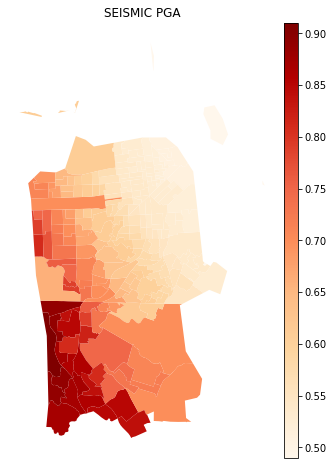

In [203]:
f, ax = plt.subplots(figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf_var.plot(ax=ax, cax=cax, column=var, cmap='OrRd', legend=True, figsize=(8,8))
ax.set_title("{}".format(var))
ax.set_axis_off()
# plt.show()
plt.savefig("values_{}.png".format(var),bbox_inches='tight', )
files.download("values_{}.png".format(var)) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

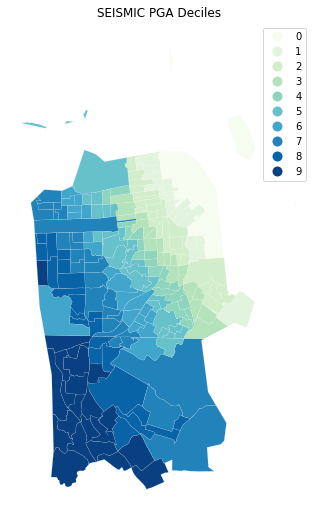

In [204]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf_var.assign(cl=varQ10.yb).plot(column='cl', categorical=True, \
        k=k, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("{} Deciles".format(var))
# plt.show()
plt.savefig("{}_deciles.png".format(var),bbox_inches='tight', )
files.download("{}_deciles.png".format(var)) 

In [205]:
# neighbor relations
w = lps.weights.Queen.from_dataframe(gdf_var)

# spatial lag
varLag = lps.weights.lag_spatial(w, gdf_var[var])

varLagQ10 = mc.Quantiles(varLag, k=k)
# feature = 'ozone'

# # load 

# hr10 = ps.Quantiles(data.HR90, k=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

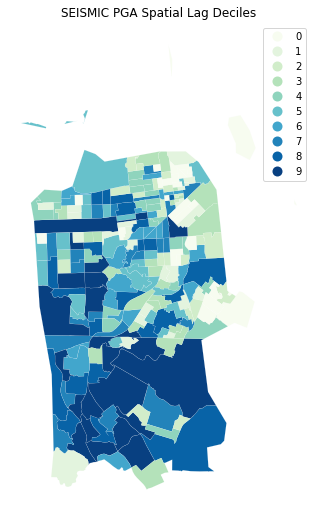

In [206]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf_var.assign(cl=varLagQ10.yb).plot(column='cl', categorical=True, \
        k=k, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("{} Spatial Lag Deciles".format(var))
plt.savefig("{}_spalag_deciles.png".format(var),bbox_inches='tight', )
files.download("{}_spalag_deciles.png".format(var)) 

In [207]:
# spatial autocorrelation
varVal = gdf_var[var]
b,a = np.polyfit(varVal, varLag, 1)

In [208]:
# f, ax = plt.subplots(1, figsize=(6, 6))

# plt.plot(varVal, varLag, '.', color='firebrick')

#  # dashed vert at mean of the last year's PCI
# plt.vlines(varVal.mean(), varLag.min(), varLag.max(), linestyle='--')
#  # dashed horizontal at mean of lagged PCI
# plt.hlines(varLag.mean(), varVal.min(), varVal.max(), linestyle='--')

# # red line of best fit using global I as slope
# plt.plot(varVal, a + b*varVal, 'r')
# plt.title('Moran Scatterplot')
# plt.ylabel('Spatial Lag of {}'.format(var))
# plt.xlabel(var)
# # plt.show()
# plt.savefig("{}_moran_scatter.png".format(var),bbox_inches='tight', )
# files.download("{}_moran_scatter.png".format(var)) 

In [209]:
# Global Spatial Autocorrelation

# Moran's I statistic
I_var = mi = Moran(gdf_var[var],  w) 
I_var.I, I_var.p_sim

(0.9436285763721618, 0.001)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

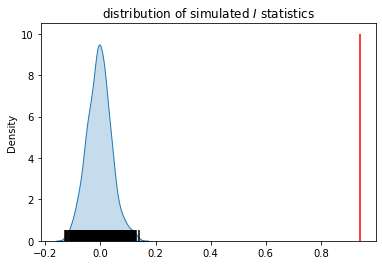

In [210]:
# visualize the distribution
sns.kdeplot(I_var.sim, shade=True)
plt.vlines(I_var.sim, 0, 0.5)
plt.vlines(I_var.I, 0, 10, 'r')
# plt.xlim([-0.2, 0.8])
plt.title("distribution of simulated $I$ statistics")
pass
plt.savefig("{}_distI.png".format(var),bbox_inches='tight', )
files.download("{}_distI.png".format(var)) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

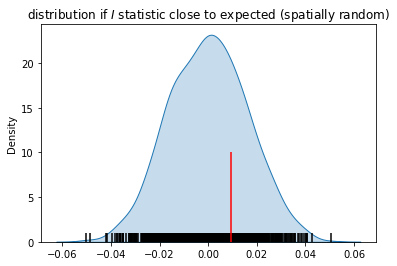

In [192]:
# if instead, I statistic closed to expected, then plot looks like:
sns.kdeplot(I_var.sim, shade=True)
plt.vlines(I_var.sim, 0, 1)
plt.vlines(I_var.EI+.01, 0, 10, 'r')
# plt.xlim([-0.15, 0.15])
plt.title("distribution if $I$ statistic close to expected (spatially random)")
pass
plt.savefig("{}_distI_exp.png".format(var),bbox_inches='tight', )
files.download("{}_distI_exp.png".format(var)) 

In [211]:
# conclude that the map pattern is not spatially random

In [212]:
# Local Autocorrelation Statistics
LMo_var = Moran_Local(gdf_var[var], w)

In [213]:
# find all of the statistically significant LISAs
sigs = varVal[LMo_var.p_sim <= .001]
W_sigs = varLag[LMo_var.p_sim <= .001]
insigs = varVal[LMo_var.p_sim > .001]
W_insigs = varLag[LMo_var.p_sim > .001]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

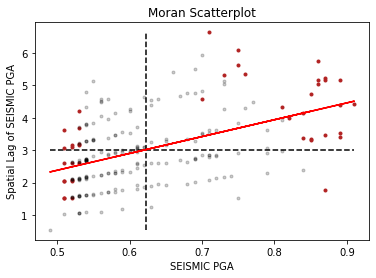

In [214]:
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
 # dashed vert at mean of the last year's PCI
plt.vlines(varVal.mean(), varLag.min(), varLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(varLag.mean(), varVal.min(), varVal.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(varVal, a + b*varVal, 'r')
# plt.text(s='$I = %.3f$' % I_var.I, x=5, y=5, fontsize=18)
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of {}'.format(var))
plt.xlabel(var)

plt.savefig("{}_local_moran_scatter.png".format(var),bbox_inches='tight', )
files.download("{}_local_moran_scatter.png".format(var)) 

In [215]:
# # LISA map of data
sig = LMo_var.p_sim < 0.05
hotspots = LMo_var.q==1 * sig
coldspots = LMo_var.q==3 * sig

# hmap = colors.ListedColormap(['grey', 'red'])
# f, ax = plt.subplots(1, figsize=(9, 9))
# gdf_var.assign(cl=hotspots*1).plot(column='cl', categorical=True, \
#         k=2, cmap=hmap, linewidth=0.1, ax=ax, \
#         edgecolor='grey', legend=False, alpha=0.8)
# ax.set_axis_off()
# ax.set_title("Hotspots of {}".format(var))

# plt.savefig("{}_hotspots.png".format(var),bbox_inches='tight', )
# files.download("{}_hotspots.png".format(var)) 

In [216]:
# cmap = colors.ListedColormap(['grey', 'blue'])
# f, ax = plt.subplots(1, figsize=(9, 9))
# gdf_var.assign(cl=coldspots*1).plot(column='cl', categorical=True, \
#         k=2, cmap=cmap, linewidth=0.1, ax=ax, \
#         edgecolor='black', legend=False,alpha=0.8)
# ax.set_axis_off()
# ax.set_title("Coldspots of {}".format(var))

# plt.savefig("{}_coldspots.png".format(var),bbox_inches='tight', )
# files.download("{}_coldspots.png".format(var)) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

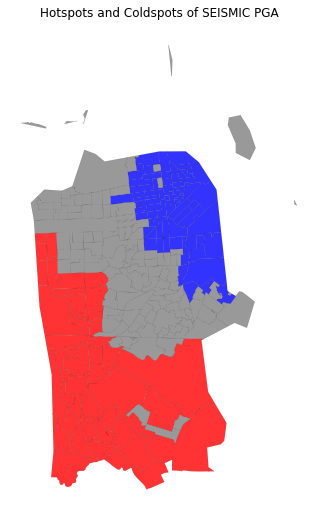

In [217]:
hcmap = colors.ListedColormap(['grey', 'red','blue'])
hotcold = hotspots*1 + coldspots*2
f, ax = plt.subplots(1, figsize=(9, 9))
gdf_var.assign(cl=hotcold).plot(column='cl', categorical=True, \
        k=2, cmap=hcmap,linewidth=0.1, ax=ax, \
        edgecolor='black', legend=False,alpha=0.8)
ax.set_axis_off()
ax.set_title("Hotspots and Coldspots of {}".format(var))

plt.savefig("{}_hotcoldspots.png".format(var),bbox_inches='tight', )
files.download("{}_hotcoldspots.png".format(var)) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

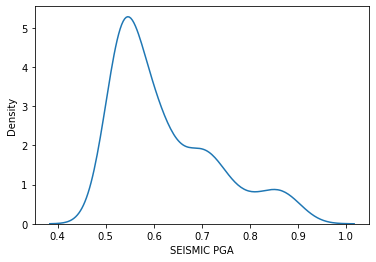

In [218]:
# distribution
sns.kdeplot(gdf_var[var])
# plt.title("distribution of values")
pass

plt.savefig("{}_dist.png".format(var),bbox_inches='tight', )
files.download("{}_dist.png".format(var)) 